In [1]:
%matplotlib inline
from modules.backtesting import BackTester
from modules.db_manager import open_file
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format #화면에 소숫점 2번째 자리까지만 표시

### 1. 전략 구현

In [2]:
def strat(trade):
    data = report.feed
    data['ma20'] = data.Settle.rolling(10).mean()
    data['ma60'] = data.Settle.rolling(60).mean()
    data['cross'] = (data.ma20 > data.ma60).astype('int')
    data['signal'] = data.cross.diff().shift(1)
    data.dropna(inplace=True)
    signals = data[(data.signal == 1) | (data.signal == -1)]
    
    for date, price, signal in signals[['Open','signal']].itertuples():
        if signal == 1:
            report.entry(date, price, position=1, lot=1)
        elif signal == -1:
            report.exit(date, price, lot=1)

### 2. 테스팅

In [2]:
feed =  open_file('h5py', 'training set/40day_trend_labeled_futures.h5', mode='r')

In [3]:
# 구현된 전략 매소드를 backtesting 클래스에 입력
testing = BackTester(feed=feed)

In [4]:
testing.run()

trading started. it takes few minutes...
processing..(61)

AttributeError: 'DataFrame' object has no attribute 'exit'

### 3. 결과 확인

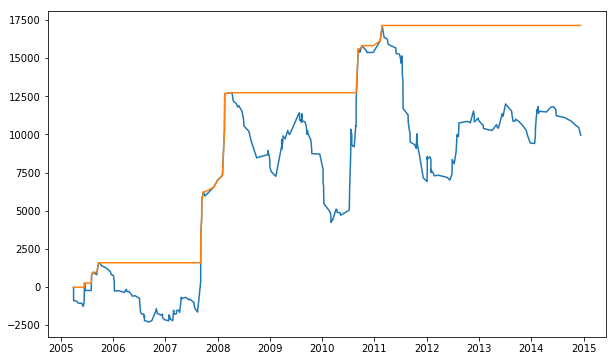

,cum_profit,ave_profit,cagr,mdd,win_rate,max_lose,max_profit,ave_win,ave_lose,pl_ratio,num_trade
Total,"9,953.20",33.51,1.57,59.76,34.01,"-1,815.00","3,493.00",573.37,-244.68,0.14,30.49


In [5]:
testing.result()

In [6]:
testing.total_receipt().head()

,cum_profit,ave_profit,cagr,mdd,win_rate,max_lose,max_profit,ave_win,ave_lose,pl_ratio,num_trade
NYMEX WTI Crude Oil,"1,331.00",42.94,1.17,121.51,41.94,-847.00,"2,408.00",648.77,-394.61,0.11,3.33
CME Lean Hogs,"-1,353.60",-46.68,0.00,"1,495.48",31.03,-345.00,740.00,182.24,-149.69,0.31,3.15
CBOT Wheat,"-1,653.00",-51.66,0.00,302.37,21.88,-612.00,997.00,370.14,-169.76,0.30,3.50
CME Nikkei 225,810.00,31.15,1.02,92.73,38.46,-270.00,900.00,235.80,-96.75,0.32,2.72
CBOT Soybeans,"2,266.00",73.10,1.31,38.06,32.26,-472.00,"1,501.00",592.20,-174.10,0.42,3.37


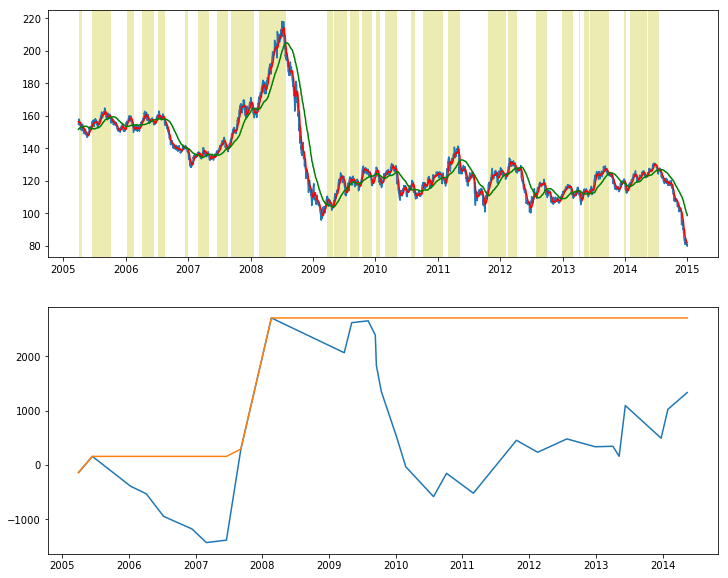

In [13]:
report = testing.reports[0]
ax = report.plot()
data = report.data
ax.plot(data.ma20, color='red')
ax.plot(data.ma60, color='green')

In [12]:
report.result()

,cum_profit,ave_profit,cagr,mdd,win_rate,max_lose,max_profit,ave_win,ave_lose,pl_ratio,num_trade
NYMEX WTI Crude Oil,"1,331.00",42.94,1.17,121.51,41.94,-847.00,"2,408.00",648.77,-394.61,0.11,3.33
